In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import datetime as dt
import re

---
# Data Cleaning

We have just imported the raw data, the first step we should do is to clean the data so that it is usable to us

In [3]:
accident_df = pd.read_csv('csv/US_Accidents_March23_sampled_500k.csv')

In [4]:
accident_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


In [47]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [48]:
accident_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,279623.000000,279623.000000,500000.000000,489534.000000,370983.000000,488870.000000,491072.000000,488709.000000,463013.000000,357384.000000
mean,2.212748,36.206421,-94.736583,36.273192,-95.776553,0.564317,61.646254,58.229028,64.834921,29.536621,9.091540,7.681347,0.008289
std,0.486661,5.071411,17.405761,5.265333,18.120211,1.774872,19.000133,22.352246,22.826158,1.008666,2.708083,5.431361,0.101865
min,1.000000,24.562117,-124.497420,24.570110,-124.497419,0.000000,-77.800000,-53.200000,1.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.416823,-117.233047,33.474773,-117.778324,0.000000,49.000000,43.000000,48.000000,29.370000,10.000000,4.600000,0.000000
50%,2.000000,35.832147,-87.794365,36.192669,-88.039013,0.029000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.082443,-80.359601,40.181341,-80.252449,0.465000,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.999569,-67.484130,48.998901,-67.484130,193.479996,207.000000,207.000000,100.000000,38.440000,130.000000,822.800000,10.130000


## Reducing data points

Our group has chosen a dataset with 500,000 data points, which is quite a lot. In order to reduce our data, we decided to use the data from the state with the most accident

In [49]:
# find state with most accidents
print("Number of states:", len(accident_df['State'].unique()))
print(accident_df['State'].value_counts())

Number of states: 49
State
CA    113274
FL     56710
TX     37355
SC     24737
NY     22594
NC     21750
VA     19515
PA     19351
MN     12333
OR     11559
AZ     11150
GA     11079
IL     10904
TN     10850
MI     10518
LA      9651
MD      9128
NJ      9020
OH      7678
WA      7004
AL      6585
UT      6310
CO      5924
OK      5296
MO      5025
CT      4602
IN      4320
MA      3917
WI      2290
KY      2101
NE      1893
MT      1871
IA      1724
AR      1483
KS      1362
NV      1343
DC      1207
RI      1093
MS       977
DE       907
WV       851
ID       718
NM       636
NH       635
WY       254
ND       238
ME       202
VT        57
SD        19
Name: count, dtype: int64


C:\Users\fazli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


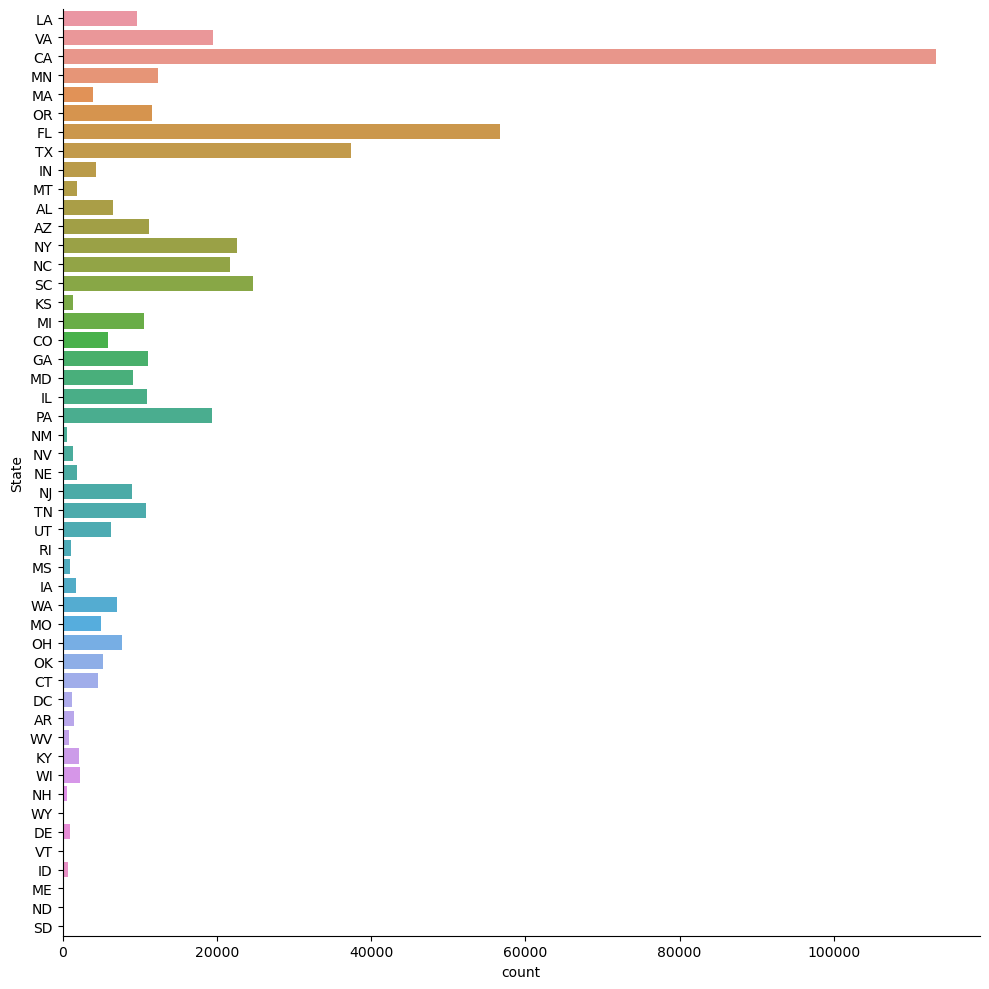

In [50]:
# plot graph
sb.catplot(y = 'State', data = accident_df, kind = 'count', height = 10)

From above, we can see that California `CA` has the most amount of accidents (113274). Thus, we can remove all the other rows that are not from `CA`. However, California still has over 100000 data points. We want to further reduce this to 10000 by taking random sample

In [51]:
# keep rows from California state
cal_accident_df = accident_df[accident_df['State'] == 'CA']

In [52]:
# before doing random sample, we remove rows that contain null values
# let us see the amount of null values in each col
cal_accident_df.isnull().sum()

ID                           0
Source                       0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                  41490
End_Lng                  41490
Distance(mi)                 0
Description                  0
Street                     161
City                         0
County                       0
State                        0
Zipcode                     38
Country                      0
Timezone                    38
Airport_Code               130
Weather_Timestamp         2037
Temperature(F)            2892
Wind_Chill(F)            32964
Humidity(%)               3054
Pressure(in)              2305
Visibility(mi)            2531
Wind_Direction            2911
Wind_Speed(mph)          10505
Precipitation(in)        36561
Weather_Condition         2521
Amenity                      0
Bump                         0
Crossing                     0
Give_Way

In [53]:
# drop rows with null values
cal_accident_df = cal_accident_df.dropna()
cal_accident_df.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
S

In [54]:
# Now, we can take a random sample
cal_accident_df = cal_accident_df.sample(30000)

In [55]:
cal_accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 321955 to 242204
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     30000 non-null  object 
 1   Source                 30000 non-null  object 
 2   Severity               30000 non-null  int64  
 3   Start_Time             30000 non-null  object 
 4   End_Time               30000 non-null  object 
 5   Start_Lat              30000 non-null  float64
 6   Start_Lng              30000 non-null  float64
 7   End_Lat                30000 non-null  float64
 8   End_Lng                30000 non-null  float64
 9   Distance(mi)           30000 non-null  float64
 10  Description            30000 non-null  object 
 11  Street                 30000 non-null  object 
 12  City                   30000 non-null  object 
 13  County                 30000 non-null  object 
 14  State                  30000 non-null  object 
 15  Z

In [56]:
# after removing the rows, we now need to reindex the dataframe
cal_accident_df = cal_accident_df.reset_index(drop=True)

In [57]:
cal_accident_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-5322236,Source1,2,2022-08-10 15:55:03.000000000,2022-08-10 18:49:00.000000000,33.869680,-117.671546,33.879800,-117.564886,6.158,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-6373728,Source1,2,2021-01-22 16:07:00.000000000,2021-01-22 18:53:43.000000000,39.139171,-120.926494,39.123982,-120.939874,1.271,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-4842655,Source1,2,2022-05-05 12:27:00,2022-05-05 14:42:57,37.773646,-121.973294,37.778636,-121.975814,0.371,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-3942993,Source1,2,2022-04-12 05:36:30.000000000,2022-04-12 09:22:30.000000000,38.013871,-121.875801,38.012447,-122.006044,7.091,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-7254400,Source1,2,2020-02-07 14:16:00,2020-02-07 15:28:00,33.930830,-118.178730,33.930920,-118.178710,0.006,...,False,False,False,False,False,False,Day,Day,Day,Day


In [58]:
cal_accident_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2.017700,35.667759,-119.460624,35.667931,-119.460000,0.767320,62.912167,62.595910,57.956833,29.479320,9.056529,6.132367,0.003379
std,0.210051,2.142632,1.919719,2.142842,1.919622,1.763119,14.157177,14.685897,24.603505,0.926295,2.590606,5.457608,0.023106
min,1.000000,32.567242,-124.300653,32.569312,-124.307438,0.000000,1.000000,-2.000000,2.000000,19.360000,0.000000,0.000000,0.000000
25%,2.000000,33.968107,-121.415803,33.968015,-121.415998,0.025000,53.000000,53.000000,38.000000,29.370000,10.000000,0.000000,0.000000
50%,2.000000,34.278183,-118.472194,34.278368,-118.472229,0.190000,62.000000,62.000000,60.000000,29.780000,10.000000,6.000000,0.000000
75%,2.000000,37.715591,-117.919943,37.718333,-117.919834,0.805000,72.000000,72.000000,78.000000,29.940000,10.000000,9.000000,0.000000
max,4.000000,41.998276,-114.377093,42.003262,-114.377093,50.312000,114.000000,114.000000,100.000000,30.520000,100.000000,142.000000,0.800000


## Columns of dataset

**ID**: This is a unique identifier of the accident record.

**Source**: Source of raw accident data

**Severity**: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

**Start_Time**: Shows start time of the accident in local time zone.

**End_Time**: Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.

**Start_Lat**: Shows latitude in GPS coordinate of the start point.

**Start_Lng**: Shows longitude in GPS coordinate of the start point.

**End_Lat**: Shows latitude in GPS coordinate of the end point.

**End_Lng**: Shows longitude in GPS coordinate of the end point.

**Distance**(mi): The length of the road extent affected by the accident in miles.

**Description**: Shows a human provided description of the accident.

**Street**: Shows the street name in address field.

**City**: Shows the city in address field.

**County**: Shows the county in address field.

**State**: Shows the state in address field.

**Zipcode**: Shows the zipcode in address field.

**Country**: Shows the country in address field.

**Timezone**: Shows timezone based on the location of the accident (eastern, central, etc.).

**Airport_Code**: Denotes an airport-based weather station which is the closest one to location of the accident.

**Weather_Timestamp**: Shows the time-stamp of weather observation record (in local time).

**Temperature**(F): Shows the temperature (in Fahrenheit).

**Wind_Chill**(F): Shows the wind chill (in Fahrenheit).

**Humidity**(%): Shows the humidity (in percentage).

**Pressure**(in): Shows the air pressure (in inches).

**Visibility**(mi): Shows visibility (in miles).

**Wind_Direction**: Shows wind direction.

**Wind_Speed**(mph): Shows wind speed (in miles per hour).

**Precipitation**(in): Shows precipitation amount in inches, if there is any.

**Weather_Condition**: Shows the weather condition (rain, snow, thunderstorm, fog, etc.)

**Amenity**: A POI annotation which indicates presence of amenity in a nearby location.

**Bump**: A POI annotation which indicates presence of speed bump or hump in a nearby location.

**Crossing**: A POI annotation which indicates presence of crossing in a nearby location.

**Give_Way**: A POI annotation which indicates presence of give_way in a nearby location.

**Junction**: A POI annotation which indicates presence of junction in a nearby location.

**No_Exit**: A POI annotation which indicates presence of no_exit in a nearby location.

**Railway**: A POI annotation which indicates presence of railway in a nearby location.

**Roundabout**: A POI annotation which indicates presence of roundabout in a nearby location.

**Station**: A POI annotation which indicates presence of station in a nearby location.

**Stop**: A POI annotation which indicates presence of stop in a nearby location.

**Traffic_Calming**: A POI annotation which indicates presence of traffic_calming in a nearby location.

**Traffic_Signal**: A POI annotation which indicates presence of traffic_signal in a nearby location.

**Turning_Loop**: A POI annotation which indicates presence of turning_loop in a nearby location.

**Sunrise_Sunset**: Shows the period of day (i.e. day or night) based on sunrise/sunset.

**Civil_Twilight**: Shows the period of day (i.e. day or night) based on civil twilight.

**Nautical_Twilight**: Shows the period of day (i.e. day or night) based on nautical twilight.

**Astronomical_Twilight**: Shows the period of day (i.e. day or night) based on astronomical twilight.

## Removing unnecessary columns

After close inspection, we decided to remove the following cols:  
`ID`, `Source`, `End_Lat`, `End_Lng`, `End_Time`, `Description`, `State`, `Country`, `Timezone`, `Airport_Code`, `Weather_Timestamp`, `Roundabout`, `Turning_Loop`, `Civil_Twilight`, `Nautical_Twilight`, `Astronomical_Twilight`

In [59]:
# remove cols that are not necessary to us
col_remove = ['ID', 'Source', 'End_Lat', 'End_Time', 'End_Lng', 'Description', 'State', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Roundabout', 'Turning_Loop', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
cal_accident_df = cal_accident_df.drop(columns=col_remove, axis=1)

In [60]:
cal_accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Severity           30000 non-null  int64  
 1   Start_Time         30000 non-null  object 
 2   Start_Lat          30000 non-null  float64
 3   Start_Lng          30000 non-null  float64
 4   Distance(mi)       30000 non-null  float64
 5   Street             30000 non-null  object 
 6   City               30000 non-null  object 
 7   County             30000 non-null  object 
 8   Zipcode            30000 non-null  object 
 9   Temperature(F)     30000 non-null  float64
 10  Wind_Chill(F)      30000 non-null  float64
 11  Humidity(%)        30000 non-null  float64
 12  Pressure(in)       30000 non-null  float64
 13  Visibility(mi)     30000 non-null  float64
 14  Wind_Direction     30000 non-null  object 
 15  Wind_Speed(mph)    30000 non-null  float64
 16  Precipitation(in)  300

## Standardisation of data

### Datetime

The `Start_Time` col consists of the date and start time of accident. However, it's datatype is listed as boolean. Let's convert it as a datetime object instead. We also need to take note that the format of the col is not uniform, with some time having the millisecond and some don't   
e.g `2022-08-20 13:13:00.000000000` and `2020-12-04 01:46:00`

In [61]:
# change object type to datetime
cal_accident_df['Start_Time'] = pd.to_datetime(cal_accident_df['Start_Time'], format = 'mixed')
cal_accident_df['Start_Time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 30000 entries, 0 to 29999
Series name: Start_Time
Non-Null Count  Dtype         
--------------  -----         
30000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 234.5 KB


### Conversion of Units

Since the raw data is from the USA where they use empirical units, we also need to convert these data back into metric units. We can do this by adding a new column that contains the converted metric units and remove the old column conatining the empirical units

Columns to change:  
`Distance(mi)`, `Visibility(mi)`, `Wind_Speed(mph)`, `Temperature(F)`, `Wind_Chill(F)`, `Precipitation(in)`, `Pressure(in)`

In [62]:
# change imperical unit to metric unit and place them in new col

# mi -> km: Distance, Visibility
# 1 mi = 1.6 km
cal_accident_df['Distance'] = cal_accident_df['Distance(mi)'] * 1.6
cal_accident_df['Distance'] = cal_accident_df['Distance'].round(2)

cal_accident_df['Visibility'] = cal_accident_df['Visibility(mi)'] * 1.6
cal_accident_df['Visibility'] = cal_accident_df['Visibility'].round(2)

# mph -> kph: Wind_Speed
cal_accident_df['Wind_Speed'] = cal_accident_df['Wind_Speed(mph)'] * 1.6
cal_accident_df['Wind_Speed'] = cal_accident_df['Wind_Speed'].round(2)

# F -> C: Temperature, Wind_Chill
# C = (F - 32) * 5/9
def farenheit_to_celcius(f):
    return (f - 32) * 5/9

cal_accident_df['Temperature'] = cal_accident_df['Temperature(F)'].apply(farenheit_to_celcius)
cal_accident_df['Temperature'] = cal_accident_df['Temperature'].round(2)

cal_accident_df['Wind_Chill'] = cal_accident_df['Wind_Chill(F)'].apply(farenheit_to_celcius)
cal_accident_df['Wind_Chill'] = cal_accident_df['Wind_Chill'].round(2)

# in -> mm: Pressure, Precipitation
# 1 in = 25.4 mm
cal_accident_df['Precipitation'] = cal_accident_df['Precipitation(in)'] * 25.4
cal_accident_df['Precipitation'] = cal_accident_df['Precipitation'].round(2)

cal_accident_df['Pressure'] = cal_accident_df['Pressure(in)'] * 25.4
cal_accident_df['Pressure'] = cal_accident_df['Pressure'].round(2)

# remove the cols with the imperial unit
remove_cols = ['Distance(mi)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Temperature(F)', 'Wind_Chill(F)', 'Precipitation(in)', 'Pressure(in)']
cal_accident_df = cal_accident_df.drop(columns=remove_cols, axis=1)

In [63]:
cal_accident_df[['Distance', 'Visibility', 'Wind_Speed', 'Temperature', 'Wind_Chill', 'Precipitation', 'Pressure']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Distance       30000 non-null  float64
 1   Visibility     30000 non-null  float64
 2   Wind_Speed     30000 non-null  float64
 3   Temperature    30000 non-null  float64
 4   Wind_Chill     30000 non-null  float64
 5   Precipitation  30000 non-null  float64
 6   Pressure       30000 non-null  float64
dtypes: float64(7)
memory usage: 1.6 MB


In [64]:
cal_accident_df[['Distance', 'Visibility', 'Wind_Speed', 'Temperature', 'Wind_Chill', 'Precipitation', 'Pressure']].head()

,Distance,Visibility,Wind_Speed,Temperature,Wind_Chill,Precipitation,Pressure
0,9.85,16.0,20.8,35.00,35.00,0.0,746.00
1,2.03,16.0,4.8,2.78,2.78,0.0,674.62
2,0.59,16.0,22.4,21.67,21.67,0.0,752.09
3,11.35,16.0,4.8,6.11,6.11,0.0,764.79
4,0.01,16.0,12.8,17.22,17.22,0.0,761.49


### Zipcode

There are two types of ZIP codes used in the United States: 5-digit (or standard) `12345` and 9-digit (or extended) `12345-6789`.  
Let us standardise it to the standard 5-digit ZIP code. Then we can group them by their first 3 digits i.e. `123XXX`

In [65]:
cal_accident_df['Zipcode'].nunique()

8502

In [66]:
cal_accident_df['Zipcode'] = cal_accident_df['Zipcode'].str[:5].astype(int)   # standard 5-digit zipcode
cal_accident_df['Zipcode'] = cal_accident_df['Zipcode'].map(lambda x: round(x,-2))  # round to nearest hundred
cal_accident_df['Zipcode'] = cal_accident_df['Zipcode'].astype(str)
print('Number of unique zipcode:', cal_accident_df['Zipcode'].nunique())
cal_accident_df['Zipcode']

Number of unique zipcode: 60


0        92900
1        95700
2        94600
3        94600
4        90300
         ...  
29995    90000
29996    95300
29997    93700
29998    95600
29999    95500
Name: Zipcode, Length: 30000, dtype: object

### Sunrise_Sunset

The column `Sunrise_Sunset` has value `Day` or `Night`. We can change the values to boolean values with `Day = True` and `Night = False` and add this into a new column called `Sunlight`

In [67]:
mapping = {'Day': True, 'Night': False}

cal_accident_df['Sunlight'] = cal_accident_df['Sunrise_Sunset'].map(mapping).astype(bool)
cal_accident_df['Sunlight']

0         True
1         True
2         True
3        False
4         True
         ...  
29995    False
29996     True
29997    False
29998    False
29999    False
Name: Sunlight, Length: 30000, dtype: bool

### Wind_Direction

The column `Wind_Direction` provide the cardinal direction of the wind direction. We can convert it into integer type by mapping the correspoding angle of the cardinal direction

In [68]:
cal_accident_df['Wind_Direction'].value_counts()

Wind_Direction
CALM    7631
W       3148
WNW     1910
WSW     1822
VAR     1777
S       1774
NW      1529
SSW     1437
SW      1395
NNW     1210
E       1069
SSE     1061
N       1009
SE       924
ESE      740
ENE      600
NE       504
NNE      460
Name: count, dtype: int64

In [69]:
cardinal_angles = {
    'North': 0,
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'South': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5,
    'CALM': -1,    # calm winds - no wind direction
    'VAR': -2,      # varying winds - cannot determine wind direction
    'Variable': -2
}

cal_accident_df['Wind_Direction'] = cal_accident_df['Wind_Direction'].map(cardinal_angles).astype(float)
cal_accident_df['Wind_Direction']

0        270.0
1         -2.0
2        292.5
3        180.0
4        247.5
         ...  
29995     -1.0
29996     -1.0
29997     22.5
29998    225.0
29999    112.5
Name: Wind_Direction, Length: 30000, dtype: float64

## Simplification

Given the huge amount of data that we have been given, we can simplify some of them by classifying similar data together

### Unique Values

In [70]:
cal_accident_df.nunique()

Severity                 4
Start_Time           29278
Start_Lat            26271
Start_Lng            26399
Street                8110
City                   911
County                  58
Zipcode                 60
Humidity(%)             99
Wind_Direction          18
Weather_Condition       47
Amenity                  2
Bump                     2
Crossing                 2
Give_Way                 2
Junction                 2
No_Exit                  2
Railway                  2
Station                  2
Stop                     2
Traffic_Calming          2
Traffic_Signal           2
Sunrise_Sunset           2
Distance              1314
Visibility              23
Wind_Speed              41
Temperature            102
Wind_Chill             113
Precipitation           46
Pressure               664
Sunlight                 2
dtype: int64

### Simplifying Weather_Condition

In [71]:
cal_accident_df['Weather_Condition'].unique()

array(['Fair', 'Cloudy', 'Mostly Cloudy', 'Light Rain', 'Fog',
       'Wintry Mix', 'Fair / Windy', 'Light Snow', 'Partly Cloudy',
       'Smoke', 'Haze', 'Mostly Cloudy / Windy', 'Heavy Rain', 'Rain',
       'Light Rain / Windy', 'Cloudy / Windy', 'N/A Precipitation',
       'Haze / Windy', 'Rain / Windy', 'Light Drizzle',
       'Partly Cloudy / Windy', 'Light Snow / Windy', 'Drizzle', 'Snow',
       'Light Rain Shower', 'Light Rain with Thunder', 'Heavy T-Storm',
       'Snow / Windy', 'Heavy Drizzle', 'Blowing Dust',
       'Showers in the Vicinity', 'Shallow Fog',
       'Thunder in the Vicinity', 'Fog / Windy', 'Snow and Thunder',
       'Heavy Snow', 'Heavy Rain / Windy', 'Patches of Fog',
       'Blowing Dust / Windy', 'T-Storm', 'Heavy T-Storm / Windy',
       'Thunder', 'Mist', 'Light Drizzle / Windy', 'Overcast',
       'Light Freezing Rain', 'Widespread Dust / Windy'], dtype=object)

We can see that there are many values that are similar to each other e.g. `Cloudy`, `Partly Cloudy`, `Mostly Cloudy`. This values can be group together and simplify our data

In [72]:
weather_bin = {
    'Fair': ['Fair'],
    'Cloudy': ['Cloudy', 'Mostly Cloudy', 'Partly Cloudy'],
    'Rainy': ['Light Rain', 'Rain', 'Light Drizzle', 'Heavy Rain', 'Drizzle', 'Showers in the Vicinity', 'T-Storm', 'Thunder', 'Patches of Fog', 'Heavy T-Storm', 'Rain / Windy', 'Heavy Rain / Windy', 'Haze / Windy', 'Fog / Windy', 'Patches of Fog / Windy', 'Light Rain with Thunder'],
    'Snowy': ['Snowy', 'Light Snow', 'Snow', 'Light Snow / Windy', 'Snow / Windy', 'Heavy Snow'],
    'Windy': ['Windy', 'Blowing Dust / Windy', 'Fair / Windy', 'Mostly Cloudy / Windy', 'Light Rain / Windy'],
    'Foggy': ['Fog', 'Shallow Fog', 'Haze', 'Smoke']
}

def map_weather_bin(weather):
    for key, value in weather_bin.items():
        if weather in value:
            return key
    return 'Others'

cal_accident_df['Weather'] = cal_accident_df['Weather_Condition'].apply(map_weather_bin)
cal_accident_df['Weather'].value_counts()

Weather
Fair      18982
Cloudy     7329
Rainy      1559
Foggy      1511
Windy       381
Others      129
Snowy       109
Name: count, dtype: int64

### Simplifying type of roads

Given how huge America is, there are many different types of road that we can find, from interstate, freeway, highway, to street, avenue, boulevard and many more. To further add to the confusion, the roads are also divided into federal, state, cities, local and many more. In order to simplfy this, we are just going to use the classify them based on the given address suffix or prefix.

We can obtain the type of road from the street address `Street` and applying some basic regex pattern

In [73]:
cal_accident_df['Street'].nunique()

8110

With close to 4000 streets, let us simplify it into their different road type/categories

In [74]:
def classify_road_type(address):
    # regex to match road types
    patterns = {
        'Street': r'\b(?:street|st)|road|rd|way|wy|broadway|bdwy|bridge|brdg\b',            # street/road/way/bridge
        'Avenue': r'\b(?:avenue|ave)|boulevard|blvd|parkway|pkwy\b',                        # avenue/boulevard/parkway
        'Drive': r'\bdrive|dr|lane|ln|court|ct|circle|cir\b',                               # drive/lane/court/circle
        'Highway': r'\bhighway|hwy|CA-|SR-|state route|interstate|I-|US-\d+|freeway|fwy\b'  # highway/interstate/freeway
    }
    for key, pattern in patterns.items():
        if re.search(pattern, address, re.IGNORECASE):
            return key
    return 'Others'

cal_accident_df['Street'] = cal_accident_df['Street'].astype(str)  # convert to str
cal_accident_df['Road_Type'] = cal_accident_df['Street'].apply(classify_road_type)
# print(cal_accident_df['Road_Type'].unique())
print(cal_accident_df['Road_Type'].value_counts())

Road_Type
Highway    12257
Street     11230
Avenue      4608
Drive       1330
Others       575
Name: count, dtype: int64


In [75]:
cal_accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Severity           30000 non-null  int64         
 1   Start_Time         30000 non-null  datetime64[ns]
 2   Start_Lat          30000 non-null  float64       
 3   Start_Lng          30000 non-null  float64       
 4   Street             30000 non-null  object        
 5   City               30000 non-null  object        
 6   County             30000 non-null  object        
 7   Zipcode            30000 non-null  object        
 8   Humidity(%)        30000 non-null  float64       
 9   Wind_Direction     30000 non-null  float64       
 10  Weather_Condition  30000 non-null  object        
 11  Amenity            30000 non-null  bool          
 12  Bump               30000 non-null  bool          
 13  Crossing           30000 non-null  bool          
 14  Give_W

In [76]:
cal_accident_df.to_csv('clean_data.csv', index=False)